In [3]:
#Feature Analysis (EDA)
#Load + Create journey table
import pandas as pd

# Load dataset
df = pd.read_csv("Dataset.csv", engine="python", on_bad_lines="skip")

# Cleaning
df["Arrival_time"] = pd.to_datetime(df["Arrival_time"], errors="coerce")
df["Departure_Time"] = pd.to_datetime(df["Departure_Time"], errors="coerce")

# Feature creation
journey = df.groupby("Train_No").agg(
    start=("Departure_Time","first"),
    end=("Arrival_time","last"),
    total_distance=("Distance","max"),
    stops=("Station_Name","count")
)

journey["duration"] = (journey["end"]-journey["start"]).dt.total_seconds()/3600
journey = journey.dropna()

print("Journey shape:", journey.shape)
journey.head()

Journey shape: (686, 5)


C:\Users\Ashu21\AppData\Local\Temp\ipykernel_14644\1972435821.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_time"] = pd.to_datetime(df["Arrival_time"], errors="coerce")
C:\Users\Ashu21\AppData\Local\Temp\ipykernel_14644\1972435821.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Departure_Time"] = pd.to_datetime(df["Departure_Time"], errors="coerce")


,start,end,total_distance,stops,duration
Train_No,,,,,
107,2026-02-23 10:25:00,2026-02-23 12:10:00,78,4,1.750000
108,2026-02-23 20:30:00,2026-02-23 22:25:00,83,4,1.916667
128,2026-02-23 19:40:00,2026-02-23 17:45:00,978,22,-1.916667
290,2026-02-23 18:30:00,2026-02-23 02:30:00,2694,14,-16.000000
401,2026-02-23 21:30:00,2026-02-23 10:00:00,1618,12,-11.500000


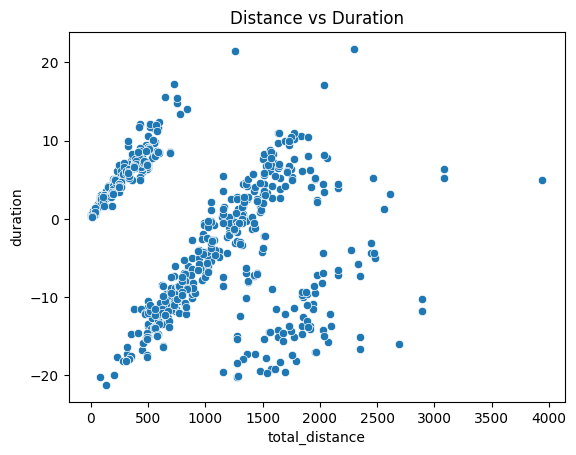

In [4]:
#Distance vs Duration
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=journey["total_distance"], y=journey["duration"])
plt.title("Distance vs Duration")
plt.show()

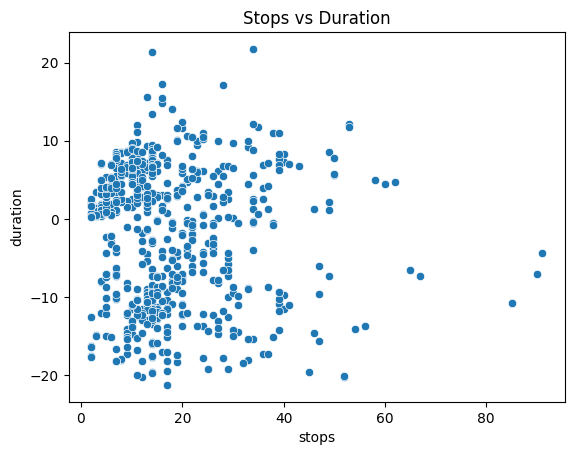

In [5]:
#Stops vs Duration
sns.scatterplot(x=journey["stops"], y=journey["duration"])
plt.title("Stops vs Duration")
plt.show()

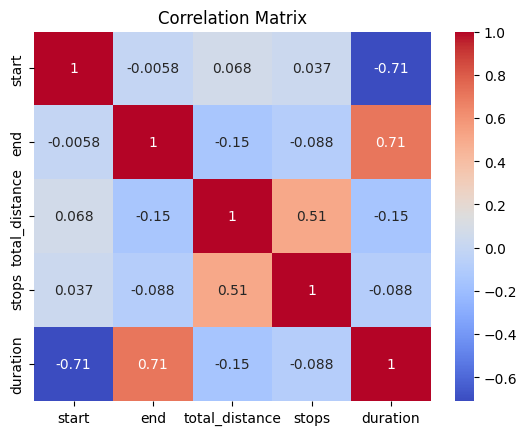

In [6]:
#Correlation Heatmap
sns.heatmap(journey.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
#Pivot table
pivot = journey.pivot_table(values="duration", index="stops")
print(pivot.head())

       duration
stops          
2     -4.255208
3     -1.211905
4      0.972222
5     -1.610119
6      1.780864
